<a href="https://colab.research.google.com/github/Timchan000/ARIMA-models/blob/main/%E3%80%8Carima_iteration_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

tesla = pd.read_csv('TSLA.csv')
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3370,2023-11-17,232.000000,237.389999,226.539993,234.300003,234.300003,142532800
3371,2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100
3372,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
3373,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600


In [ ]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
complete_date_range = pd.date_range(start = '2010-06-30', end = '2023-11-24')
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])
df = pd.merge(df_dates, tesla, on='Date', how='left')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0
3,2010-07-03,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4891,2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100.0
4892,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000.0
4893,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600.0
4894,2023-11-23,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0
3,2010-07-03,1.483333,1.488333,1.199333,1.228500,1.228500,83573625.0
4,2010-07-04,1.433333,1.436667,1.151333,1.177000,1.177000,90050250.0
...,...,...,...,...,...,...,...
4891,2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100.0
4892,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000.0
4893,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600.0
4894,2023-11-23,237.894996,241.379998,231.864998,234.830002,234.830002,91537900.0


In [ ]:
from sklearn.model_selection import train_test_split
data=df['Close']

data_rolling_mean = data.rolling(window=30).mean().fillna(0)

train_data, temp = train_test_split(data_rolling_mean, train_size=0.7, shuffle=False)
val_data, test_data = train_test_split(temp, train_size=0.5, shuffle=False)

print("Train set length:", len(train_data))
print("Validation set length:", len(val_data))
print("Test set length:", len(test_data))

Train set length: 3427
Validation set length: 734
Test set length: 735


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

train_data = np.array(train_data)
val_data = np.array(val_data)

best_mse, best_order = float("inf"), None

pdq = list(itertools.product(range(6), repeat=3))

for order in pdq:
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(val_data)-1)
        mse = mean_squared_error(val_data, predictions)
        if mse < best_mse:
            best_mse, best_order = mse, order
    except:
        continue

print(f'Best ARIMA{best_order} MSE={best_mse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conve

Best ARIMA(5, 3, 3) MSE=1404.567280230614


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


model = ARIMA(train_data, order=(5,3,3))
model_fit = model.fit()


full_dataset_pred = model_fit.predict(start=0, end=len(data_rolling_mean)-1, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


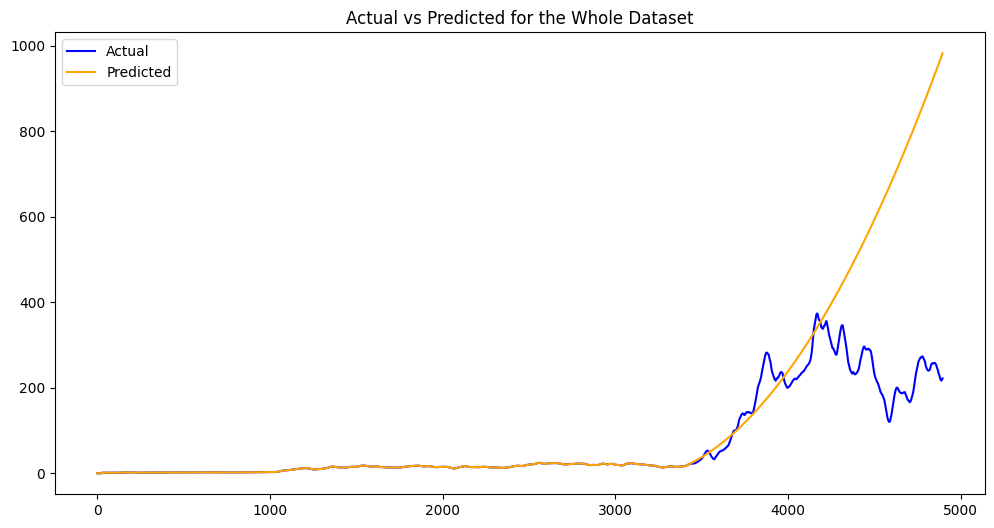

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_rolling_mean, label='Actual', color='blue')
plt.plot(full_dataset_pred, label='Predicted', color='orange')
plt.legend()
plt.title('Actual vs Predicted for the Whole Dataset')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_train = mean_absolute_error(data_rolling_mean[:len(train_data)], full_dataset_pred[:len(train_data)])
mae_validation = mean_absolute_error(data_rolling_mean[len(train_data):len(train_data)+len(val_data)],full_dataset_pred[len(train_data):len(train_data)+len(val_data)])
mae_test = mean_absolute_error(data_rolling_mean[len(train_data)+len(val_data):], full_dataset_pred[len(train_data)+len(val_data):])

print('The MAE for train is',mae_train)
print('The MAE for validation is',mae_validation)
print('The MAE for test is',mae_test)

The MAE for train is 0.011712663257687446
The MAE for validation is 27.668848288231445
The MAE for test is 384.1663198189946


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_train = mean_squared_error(data_rolling_mean[:len(train_data)], full_dataset_pred[:len(train_data)])
mse_validation = mean_squared_error(data_rolling_mean[len(train_data):len(train_data)+len(val_data)],full_dataset_pred[len(train_data):len(train_data)+len(val_data)])
mse_test = mean_squared_error(data_rolling_mean[len(train_data)+len(val_data):], full_dataset_pred[len(train_data)+len(val_data):])

print('The MSE for train is',mse_train)
print('The MSE for validation is',mse_validation)
print('The MSE for test is',mse_test)

The MSE for train is 0.0010142492796332216
The MSE for validation is 1404.567280230614
The MSE for test is 198122.7600969902


In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_validation = np.sqrt(mse_validation)
rmse_test = np.sqrt(mse_test)

print('The RMSE for train is', rmse_train)
print('The RMSE for validation is',rmse_validation)
print('The RMSE for test is', rmse_test)

The RMSE for train is 0.031847280568884084
The RMSE for validation is 37.47755702057718
The RMSE for test is 445.1098292522759
